<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/MNIST_MLP_LabelEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MLP for MNIST
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

11490434/11490434 [==============================] - 0s 0us/step
train: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


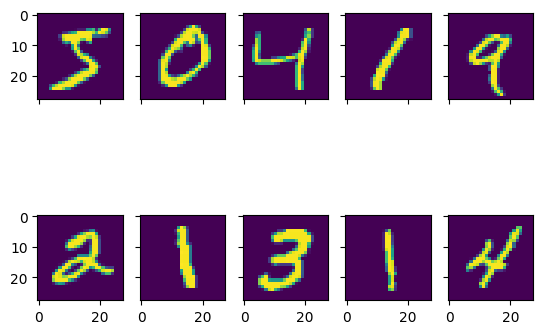

In [ ]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()  #60000 samples for training, 10000 samples for testing

print('train:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

# visualize some
fig, ax = plt.subplots(2,5,sharex=True,sharey=True)
ax = ax.flatten()
for i in range(10):
  ax[i].imshow(x_train[i,:])
plt.show()

# prepare the data for training
x_train = x_train.reshape(60000,28*28)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,28*28)
x_test = x_test.astype('float32')/255


In [ ]:
# label encoder it will give a label to each class
le = LabelEncoder()
le.fit(y_train)
le.classes_
y_train = le.transform(y_train)
y_test = le.transform(y_test)

[5 0 4 1 9 2 1 3 1 4]
(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [ ]:
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [ ]:
mlp = MLPClassifier(solver='sgd', activation='logistic',alpha=1e-4,hidden_layer_sizes=(100,30),
                    random_state=1, max_iter=100,verbose=True, learning_rate_init=.1, tol=1e-4)
mlp.fit(x_train, y_train)

print("Training set score: %f" % mlp.score(x_train, y_train))
print("Test set score: %f" % mlp.score(x_test, y_test))

y_pred = mlp.predict(x_test)

Iteration 1, loss = 1.14375834
Iteration 2, loss = 0.33787392
Iteration 3, loss = 0.25119173
Iteration 4, loss = 0.20038458
Iteration 5, loss = 0.16473275
Iteration 6, loss = 0.13786252
Iteration 7, loss = 0.11867794
Iteration 8, loss = 0.10371738
Iteration 9, loss = 0.09222830
Iteration 10, loss = 0.08235222
Iteration 11, loss = 0.07482808
Iteration 12, loss = 0.06700804
Iteration 13, loss = 0.06103332
Iteration 14, loss = 0.05569151
Iteration 15, loss = 0.05137623
Iteration 16, loss = 0.04693709
Iteration 17, loss = 0.04291575
Iteration 18, loss = 0.03968209
Iteration 19, loss = 0.03648449
Iteration 20, loss = 0.03332571
Iteration 21, loss = 0.03082992
Iteration 22, loss = 0.02806604
Iteration 23, loss = 0.02616177
Iteration 24, loss = 0.02401018
Iteration 25, loss = 0.02225455
Iteration 26, loss = 0.02085409
Iteration 27, loss = 0.01876685
Iteration 28, loss = 0.01721190
Iteration 29, loss = 0.01640115
Iteration 30, loss = 0.01502333
Iteration 31, loss = 0.01394246
Iteration 32, los

[0 1 2 3 4 5 6 7 8 9]


<Figure size 640x480 with 0 Axes>

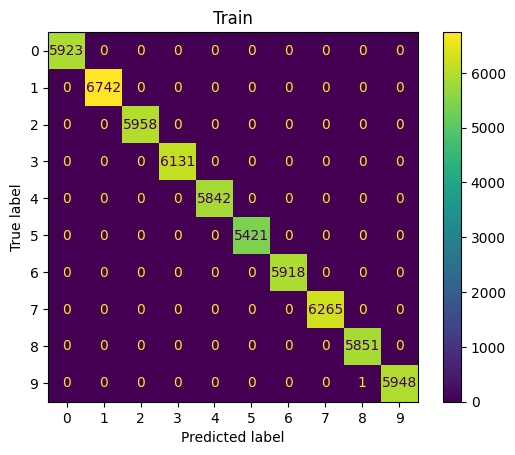

<Figure size 640x480 with 0 Axes>

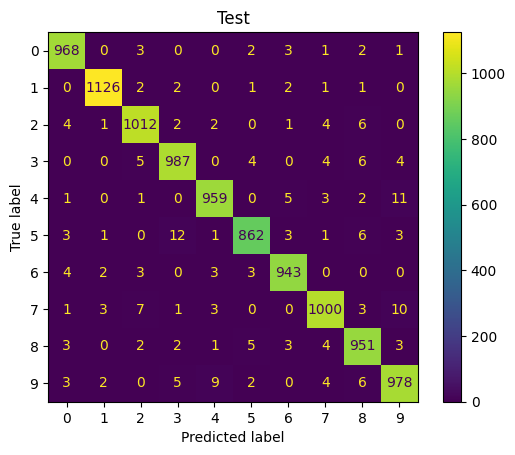

In [ ]:
print(mlp.classes_)

#confusion matrix
def cm(model, x_test, y_test, title):

  cm = confusion_matrix(y_test, model.predict(x_test))

  plt.figure()
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= model.classes_)
  disp.plot()
  plt.title(title)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

cm(mlp, x_train, y_train, title = 'Train')
cm(mlp, x_test, y_test, title = 'Test')